In [ ]:
#The code below gives you the boundary of undeformed and deformed shape of the body.

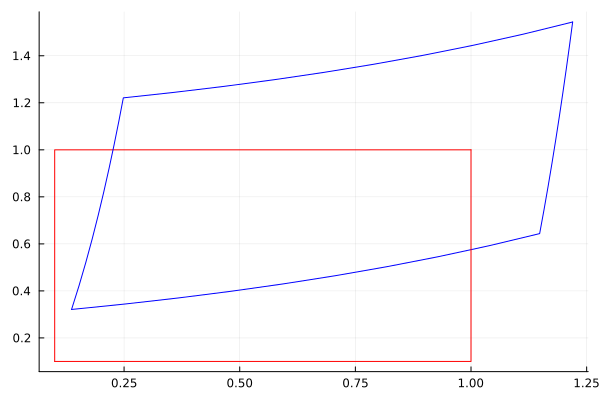

In [ ]:
using Plots

xvals = 0.1:0.1:1
yvals = 0.1:0.1:1

calcA(a, b) = 0.2 * log(1 + a + b) + a
calcB(a, b) = 0.2 * exp(a) + b

allA = Float64[]
allB = Float64[]
xx = repeat(xvals, inner = length(yvals))
yy = repeat(yvals, outer = length(xvals))

for u in xvals
    for v in yvals
        aa = calcA(u, v)
        bb = calcB(u, v)
        push!(allA, aa)
        push!(allB, bb)
    end
end

bx1 = Float64[]
by1 = Float64[]
ba1 = Float64[]
bb1 = Float64[]

for p1 in xvals
    for q1 in yvals
        if p1 == 0.1
            push!(bx1, p1)
            push!(by1, q1)
            push!(ba1, calcA(p1, q1))
            push!(bb1, calcB(p1, q1))
        end
        if q1 == 1
            push!(bx1, p1)
            push!(by1, q1)
            push!(ba1, calcA(p1, q1))
            push!(bb1, calcB(p1, q1))
        end
    end
end

bx2 = Float64[]
by2 = Float64[]
ba2 = Float64[]
bb2 = Float64[]

for p2 in xvals
    for q2 in yvals
        if p2 == 1
            push!(bx2, p2)
            push!(by2, q2)
            push!(ba2, calcA(p2, q2))
            push!(bb2, calcB(p2, q2))
        end
        if q2 == 0.1
            push!(bx2, p2)
            push!(by2, q2)
            push!(ba2, calcA(p2, q2))
            push!(bb2, calcB(p2, q2))
        end
    end
end

plot(bx1, by1, seriestype = :line, color = :red)
plot!(ba2, bb2, seriestype = :line, color = :blue)
plot!(ba1, bb1, seriestype = :line, color = :blue)
plot!(bx2, by2, seriestype = :line, color = :red, legend = false)


In [ ]:
##By adding two scatter plot commands, you can visualize how different points are displaced.


In [ ]:
scatter!(allA, allB, marker = :x, color = :black)
scatter!(ba1, bb1, marker = :x, color = :orchid, legend = false)


In [ ]:
#Question2

In [ ]:
# The code below visualizes both the boundary of the undeformed and deformed body,
# as well as the displacement trend of various points.

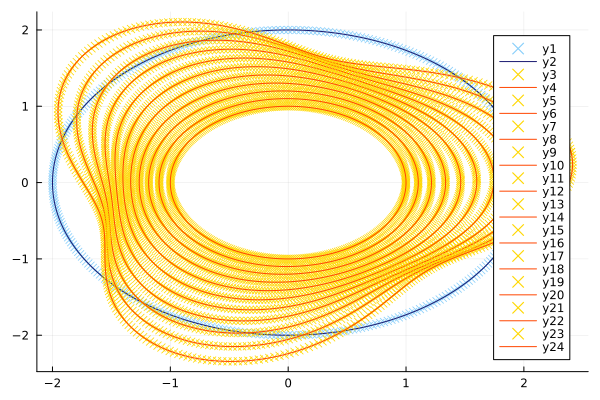

In [ ]:
using Plots

rr = 1:0.1:2
tt = 0:1:360

plot()

xxfun(a, b) = a * cosd(b)
yyfun(a, b) = a * sind(b)

p1 = Float64[]
p2 = Float64[]

for rr0 in rr
    for tt0 in tt
        px = xxfun(rr0, tt0)
        py = yyfun(rr0, tt0)
        push!(p1, px)
        push!(p2, py)
    end
    scatter(p1, p2, m = :x, color = :lightskyblue)
    plot!(p1, p2, color = :midnightblue)
    p1 = Float64[]
    p2 = Float64[]
end


fuu(a1, a2) = 0.4 * (a1 - 1)^2 * cosd(3a2) * cosd(a2) - 0.4 * (a1 - 1)^3 * sind(a2)
fvv(b1, b2) = 0.4 * (b1 - 1)^2 * cosd(3b2) * sind(b2) + 0.4 * (b1 - 1)^3 * cosd(b2)

t1 = Float64[]
t2 = Float64[]

for r0 in rr
    for t0 in tt
        nnx = fuu(r0, t0) + xxfun(r0, t0)
        nny = fvv(r0, t0) + yyfun(r0, t0)
        push!(t1, nnx)
        push!(t2, nny)
    end
    scatter!(t1, t2, m = :x, color = :gold)
    plot!(t1, t2, color = :orangered)
    t1 = Float64[]
    t2 = Float64[]
end

plot!()


In [ ]:
#Question 3

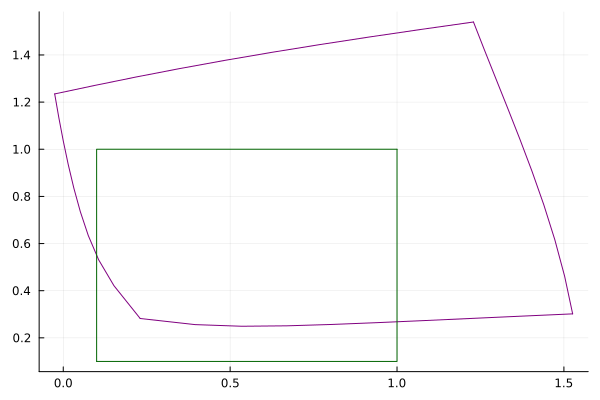

In [1]:
using Plots
X₁ = 0.1:0.1:1
X₂ = 0.1:0.1:1

u₁(x, y) = 0.2 * exp(x) * cos(atan(y,x)) - 0.2 * log(1+x+y) * sin(atan(y,x))
u₂(x, y) = 0.2 * exp(x) * sin(atan(y,x)) + 0.2 * log(1+x+y) * cos(atan(y,x))


p = repeat(X₁,inner = length(X₂))
q = repeat(X₂,outer = length(X₁))

p1 = []
p2 = []
for i in X₁ 
    for j in X₂
       push!(p1, u₁(i,j) + i)
       push!(p2, u₂(i,j) + j )
    end
end

v1 = []
v2 = []
v3 = []
v4 = []
x1 = []
x2 = []

for i in X₁ 
    for j in X₂
       if i==0.1 
         push!(v1, u₁(i,j) + i)
         push!(v2, u₂(i,j) + j)
         push!(x1,i)
         push!(x2,j)
       end
    end
end

for i in X₁ 
    for j in X₂
       if j==1
         push!(v3, u₁(i,j) + i)
         push!(v4, u₂(i,j) + j)
         push!(x1,i)
         push!(x2,j)
       end
    end
end
v5 = []
v6 = []
v7 = []
v8 = []
x3 = []
x4 = []
for i in X₁ 
    for j in X₂
       if i==1 
         push!(v5, u₁(i,j) + i)
         push!(v6, u₂(i,j) + j)
         push!(x3,i)
         push!(x4,j)
        end
    end
end
for i in X₁ 
    for j in X₂    
        if j==0.1
         push!(v7, u₁(i,j) + i)
         push!(v8, u₂(i,j) + j)  
         push!(x3,i)
         push!(x4,j)
        end
    end
end
plot(v1, v2, seriestype=:line,color=:purple)
plot!(v3, v4, seriestype=:line,color=:purple)
plot!(v5, v6, seriestype=:line,color=:purple)
plot!(v7, v8, seriestype=:line,color=:purple)
plot!(x1, x2, seriestype=:line,color=:darkgreen)
plot!(x3, x4, seriestype=:line,color=:darkgreen,legend=:none)





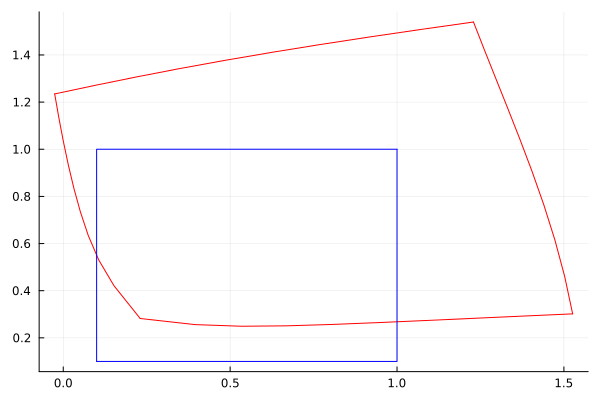

In [2]:
using Plots

X1 = 0.1:0.1:1
X2 = 0.1:0.1:1

F1(x,y) = 0.2 * exp(x) * cos(atan(y,x)) - 0.2 * log(1 + x + y) * sin(atan(y,x))
F2(x,y) = 0.2 * exp(x) * sin(atan(y,x)) + 0.2 * log(1 + x + y) * cos(atan(y,x))

mesh_x = repeat(X1, inner = length(X2))
mesh_y = repeat(X2, outer = length(X1))

all_u = Float64[]
all_v = Float64[]
for i in X1, j in X2
    push!(all_u, F1(i,j) + i)
    push!(all_v, F2(i,j) + j)
end

b1_u = Float64[]
b1_v = Float64[]
b1_x = Float64[]
b1_y = Float64[]
for i in X1, j in X2
    if i == 0.1
        push!(b1_u, F1(i,j) + i)
        push!(b1_v, F2(i,j) + j)
        push!(b1_x, i)
        push!(b1_y, j)
    end
end

b2_u = Float64[]
b2_v = Float64[]
b2_x = Float64[]
b2_y = Float64[]
for i in X1, j in X2
    if j == 1
        push!(b2_u, F1(i,j) + i)
        push!(b2_v, F2(i,j) + j)
        push!(b2_x, i)
        push!(b2_y, j)
    end
end

b3_u = Float64[]
b3_v = Float64[]
b3_x = Float64[]
b3_y = Float64[]
for i in X1, j in X2
    if i == 1
        push!(b3_u, F1(i,j) + i)
        push!(b3_v, F2(i,j) + j)
        push!(b3_x, i)
        push!(b3_y, j)
    end
end

b4_u = Float64[]
b4_v = Float64[]
b4_x = Float64[]
b4_y = Float64[]
for i in X1, j in X2
    if j == 0.1
        push!(b4_u, F1(i,j) + i)
        push!(b4_v, F2(i,j) + j)
        push!(b4_x, i)
        push!(b4_y, j)
    end
end

edge1_x = vcat(b1_x, b2_x)
edge1_y = vcat(b1_y, b2_y)

edge2_x = vcat(b3_x, b4_x)
edge2_y = vcat(b3_y, b4_y)

plot(b1_u, b1_v, seriestype = :line, color = :red)
plot!(b2_u, b2_v, seriestype = :line, color = :red)
plot!(b3_u, b3_v, seriestype = :line, color = :red)
plot!(b4_u, b4_v, seriestype = :line, color = :red)

plot!(edge1_x, edge1_y, seriestype = :line, color = :blue)
plot!(edge2_x, edge2_y, seriestype = :line, color = :blue, legend = false)


In [ ]:
#Just by adding two scatter plot commands, trend of how different points gets displaced
is obtained.

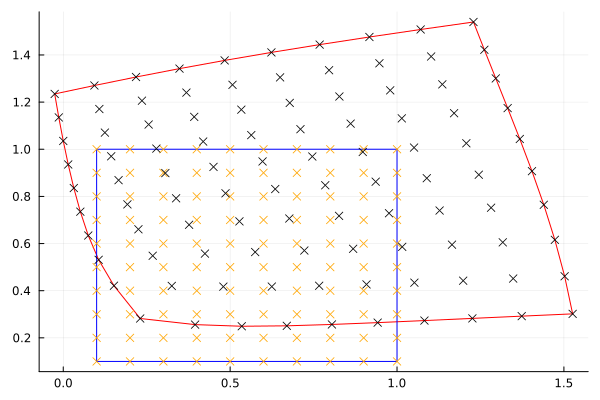

In [3]:
scatter!(p, q, m=:x, color=:orange)
scatter!(p1, p2, m=:x, color=:black, legend=:none)


In [ ]:
#Question4

In [ ]:
using Gmsh

# -------------------------------------------------------------
# PARAMETERS
# -------------------------------------------------------------
const L = 1000          # plate length
const H = 400           # plate height
const di = 75           # hole diameter
const R = di/2          # radius
const thickness = 2.0   # mm thickness (extrusion)
const h_coarse = 5
const h_fine   = 0.5

# Hole center
const cx = L/2
const cy = H/2

gmsh.initialize()
gmsh.option.setNumber("General.Terminal", 1)

# -------------------------------------------------------------
# RECTANGLE POINTS (2D footprint)
# -------------------------------------------------------------
p1 = gmsh.model.geo.addPoint(0.0, 0.0, 0.0, h_coarse)
p2 = gmsh.model.geo.addPoint(L,   0.0, 0.0, h_coarse)
p3 = gmsh.model.geo.addPoint(L,   H,   0.0, h_coarse)
p4 = gmsh.model.geo.addPoint(0.0, H,   0.0, h_coarse)

# -------------------------------------------------------------
# CIRCLE POINTS
# -------------------------------------------------------------
pc = gmsh.model.geo.addPoint(cx, cy, 0.0, h_fine)  

p5 = gmsh.model.geo.addPoint(cx + R, cy,     0.0, h_fine)
p6 = gmsh.model.geo.addPoint(cx,     cy + R, 0.0, h_fine)
p7 = gmsh.model.geo.addPoint(cx - R, cy,     0.0, h_fine)
p8 = gmsh.model.geo.addPoint(cx,     cy - R, 0.0, h_fine)

# -------------------------------------------------------------
# OUTER LINES
# -------------------------------------------------------------
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

# -------------------------------------------------------------
# PERFECT CIRCLE USING CENTER pc
# -------------------------------------------------------------
c1 = gmsh.model.geo.addCircleArc(p5, pc, p6)
c2 = gmsh.model.geo.addCircleArc(p6, pc, p7)
c3 = gmsh.model.geo.addCircleArc(p7, pc, p8)
c4 = gmsh.model.geo.addCircleArc(p8, pc, p5)

hole_loop  = gmsh.model.geo.addCurveLoop([c1, c2, c3, c4])
outer_loop = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])

surface2D = gmsh.model.geo.addPlaneSurface([outer_loop, hole_loop])

# -------------------------------------------------------------
# EXTRUDE 2D → 3D (thickness = 2 mm)
# -------------------------------------------------------------
# extrude along +z direction
th = thickness   # mm
vol_info = gmsh.model.geo.extrude(
    [(2, surface2D)],        # (dimension=2, tag=surface)
    0, 0, th                 # extrusion vector (x,y,z)
)

# vol_info contains surface & volume tags; extract volume:
volume_tag = vol_info[end][2]   # last created entity is the volume

# -------------------------------------------------------------
# PHYSICAL GROUPS
# -------------------------------------------------------------
pg_vol = gmsh.model.addPhysicalGroup(3, [volume_tag])
gmsh.model.setPhysicalName(3, pg_vol, "Solid")

# Bottom face (original 2D)
pg_bottom = gmsh.model.addPhysicalGroup(2, [surface2D])
gmsh.model.setPhysicalName(2, pg_bottom, "Bottom")

# Top face (extruded)
top_surface_tag = vol_info[1][2]   # first new surface is top
pg_top = gmsh.model.addPhysicalGroup(2, [top_surface_tag])
gmsh.model.setPhysicalName(2, pg_top, "Top")

# -------------------------------------------------------------
# MESH REFINEMENT AROUND HOLE (2D field, auto-inherited in 3D)
# -------------------------------------------------------------
gmsh.model.mesh.field.add("Distance", 1)
gmsh.model.mesh.field.setNumbers(1, "CurvesList", [c1, c2, c3, c4])

gmsh.model.mesh.field.add("Threshold", 2)
gmsh.model.mesh.field.setNumber(2, "IField", 1)
gmsh.model.mesh.field.setNumber(2, "LcMin", h_fine)
gmsh.model.mesh.field.setNumber(2, "LcMax", h_coarse)
gmsh.model.mesh.field.setNumber(2, "DistMin", R)
gmsh.model.mesh.field.setNumber(2, "DistMax", H)

gmsh.model.mesh.field.setAsBackgroundMesh(2)

gmsh.model.geo.synchronize()
gmsh.model.mesh.generate(3)
gmsh.write("PlateWithCenteredHole_3D.msh")
gmsh.finalize()


In [ ]:
using Gridap
using GridapGmsh
model = GmshDiscreteModel("PlateWithCenteredHole_3D.msh")
writevtk(model ,"PlateWithCenteredHole_3D")

In [ ]:
#Question 5 and 6 

In [ ]:
#(a)
using Gmsh
gmsh.initialize()
gmsh.model.add("cantilever_beam")

# Define parameters
L = 1.0      # length
W = 0.2     # width
H = 0.25    # thickness
h = 0.1     # mesh size

cx = L/2
cy = W/2

# Outer rectangle
p1 = gmsh.model.geo.addPoint(0, 0, 0, h)
p2 = gmsh.model.geo.addPoint(L, 0, 0, h)
p3 = gmsh.model.geo.addPoint(L, W, 0, h)
p4 = gmsh.model.geo.addPoint(0, W, 0, h)

l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

loop_out = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])

# Plane surface with inner hole
surf = gmsh.model.geo.addPlaneSurface([loop_out])

gmsh.model.geo.synchronize()

# Extrude full 3D brick
gmsh.model.geo.extrude([(2, surf)], 0, 0, H)

gmsh.model.geo.synchronize()

gmsh.model.mesh.generate(3)
gmsh.write("q5.msh")

gmsh.fltk.run()
gmsh.finalize()



Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 6 (Line)
Info    : [ 50%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 60%] Meshing curve 9 (Line)
Info    : [ 70%] Meshing curve 11 (Line)
Info    : [ 80%] Meshing curve 12 (Line)
Info    : [ 90%] Meshing curve 16 (Line)
Info    : [100%] Meshing curve 20 (Line)
Info    : Done meshing 1D (Wall 0.00101089s, CPU 0s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 13 (Surface, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 17 (Surface, Frontal-Delaunay)
Info    : [ 60%] Meshing surface 21 (Surface, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 25 (Surface, Frontal-Delaunay)
Info    : [ 90%] Meshing surface 26 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.00

In [ ]:
using Gridap
using GridapGmsh
model = GmshDiscreteModel("q5.msh")

writevtk(model,"q5")